In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvdi-data/hacktest.csv
/kaggle/input/nvdi-data/hacktrain.csv


In [43]:
test=pd.read_csv('/kaggle/input/nvdi-data/hacktest.csv')
test.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [44]:
train=pd.read_csv('/kaggle/input/nvdi-data/hacktrain.csv')
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [45]:
train.shape

(8000, 30)

<Axes: >

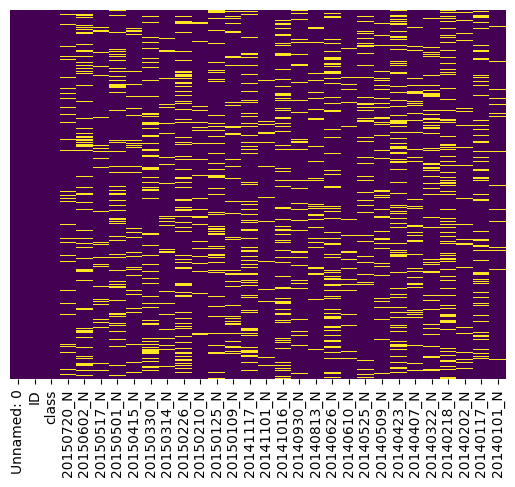

In [46]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

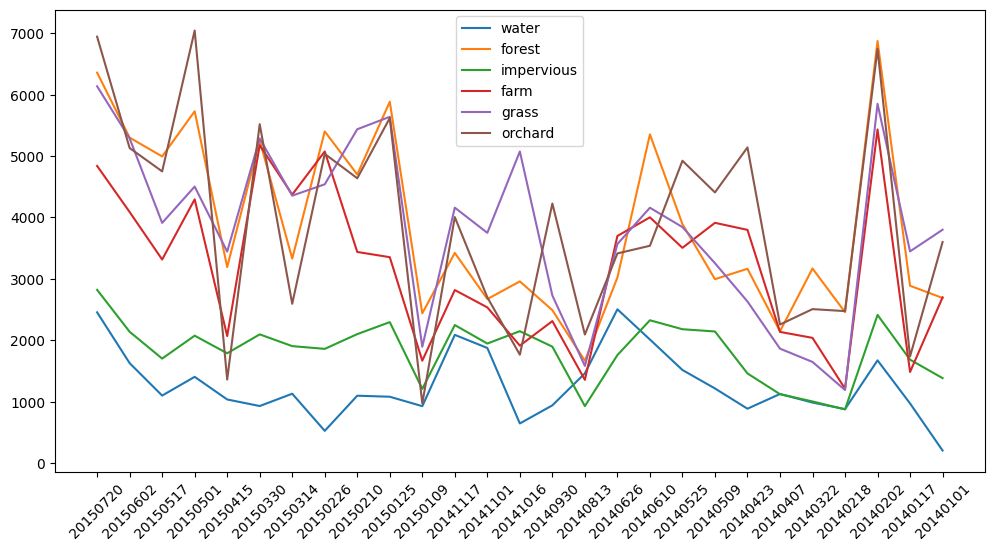

In [47]:
ndvi_cols = [col for col in train.columns if col.endswith('_N')]

date_labels = [col.split('_')[0] for col in ndvi_cols]

plt.figure(figsize=(12, 6))

for land_type in train['class'].unique():
    subset = train[train['class'] == land_type]
    mean_ndvi = subset[ndvi_cols].mean()
    plt.plot(date_labels, mean_ndvi, label=land_type)

plt.xticks(rotation=45)
plt.legend()
plt.show()

In [48]:
for col in train.columns:
    if col.endswith('_N'):
        mean=train.groupby(['class'])[col].transform('mean')
        train[col] = train[col].fillna(mean)

<Axes: >

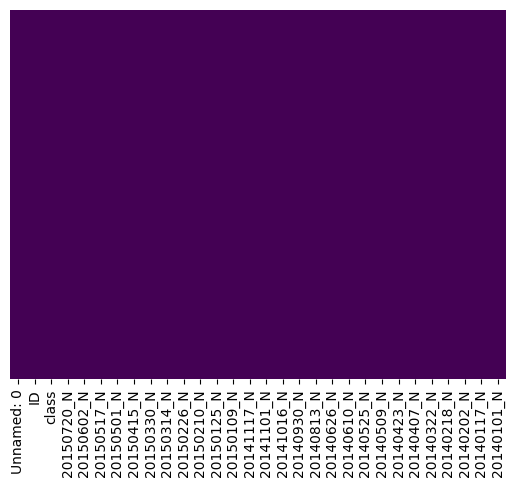

In [49]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [66]:
ndvi_col=[col for col in train.columns if col.endswith('_N')]
X=train[ndvi_col]

labenc=LabelEncoder();

Y=labenc.fit_transform(train['class'])
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

scaler=StandardScaler()
Xscaled=scaler.fit_transform(Xtrain)
Xtestscaled=scaler.fit_transform(Xtest)

In [67]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(Xscaled, Ytrain)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [68]:
pred = model.predict(Xtestscaled)
accuracy = accuracy_score(Ytest,pred)
print(accuracy)

0.91125


In [70]:
Xtestfinal=test[ndvi_cols]
Xtestscaledfinal=scaler.fit_transform(Xtestfinal)

YFinal=model.predict(Xtestscaledfinal)

In [72]:
labels = labenc.inverse_transform(YFinal)

In [75]:
sub=pd.DataFrame({'ID': test['ID'],'class':labels})

In [80]:
sub.to_csv('sub.csv',index=False)

In [81]:
sub

,ID,class
0,1,orchard
1,2,forest
2,3,orchard
3,4,forest
4,5,orchard
...,...,...
2840,2841,water
2841,2842,impervious
2842,2843,water
2843,2844,water


In [89]:
print(labenc.inverse_transform(model.predict([[0.34,0.52,0.72,0.18,0.34,0.56,0.43,0.23,0.433,0.74,0.45,0.56,0.23,0.24,0.35,0.85,0.95,0.45,0.65,0.45,0.67,0.82,0.4734,0.564,0.589,0.12,0.455]])))

['forest']


In [90]:
import joblib

In [91]:
joblib.dump(model,'NVDI Model.pkl')

['NVDI Model.pkl']

In [92]:
joblib.dump(scaler,'Scaler.pkl')

['Scaler.pkl']